# Examing Data from COVID-19 Outbreak

#### Import Libraries

In [1]:
import pandas as pd
from datetime import date, timedelta
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Import Latest XLS from ECDC website

In [2]:
today = date.today()

In [3]:
day = today.strftime("%d")
month = today.strftime("%m")

In [4]:
url  = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-{}-{}.xls".format(month, day)

#### Load into DataFrame

In [5]:
df = pd.read_excel(url)

In [6]:
df

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
4996,2020-01-04,Vietnam,0,0,VN,NaN,Non-EU/EEA
4997,2020-01-03,Vietnam,0,0,VN,NaN,Non-EU/EEA
4998,2020-01-02,Vietnam,0,0,VN,NaN,Non-EU/EEA
4999,2020-01-01,Vietnam,0,0,VN,NaN,Non-EU/EEA


#### Fix Date format from Excel to DateTime

In [7]:
#def read_date(date):
#    return xlrd.xldate.xldate_as_datetime(date, 0)

In [8]:
#df['DateRep'] = pd.to_datetime(df['DateRep'].apply(read_date), errors='coerce')

In [9]:
df

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
4996,2020-01-04,Vietnam,0,0,VN,NaN,Non-EU/EEA
4997,2020-01-03,Vietnam,0,0,VN,NaN,Non-EU/EEA
4998,2020-01-02,Vietnam,0,0,VN,NaN,Non-EU/EEA
4999,2020-01-01,Vietnam,0,0,VN,NaN,Non-EU/EEA


#### Set Date as Index

In [10]:
df.set_index('DateRep', inplace=True)
df = df.sort_index()

In [11]:
df

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
DateRep,,,,,,
2019-12-31,Vietnam,0,0,VN,NaN,Non-EU/EEA
2019-12-31,Sri Lanka,0,0,LK,NaN,Non-EU/EEA
2019-12-31,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0
2019-12-31,Kuwait,0,0,KW,NaN,Non-EU/EEA
2019-12-31,Armenia,0,0,AM,NaN,Non-EU/EEA
...,...,...,...,...,...,...
2020-03-14,Georgia,21,0,GE,NaN,Non-EU/EEA
2020-03-14,Greece,57,0,EL,NaN,EU
2020-03-14,North Macedonia,4,0,MK,NaN,EU Candidate


#### Fix Inconsistent Capitalisation of Country Names

In [12]:
countries = df['CountryExp'].values
np.unique(countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Cases on an international conveyance Japan', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Czech republic',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guinea', 'Guyana', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait',
       'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembour

In [13]:
df.replace(['United kingdom', 'Czech republic', 'switzerland'], ['United Kingdom', 'Czech Republic', 'Switzerland'], inplace=True)

In [14]:
countries = df['CountryExp'].values
np.unique(countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Cases on an international conveyance Japan', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guinea', 'Guyana', 'Holy See', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malaysia', 'M

#### Examine Global Numbers

In [15]:
df_global = df[['NewConfCases', 'NewDeaths']].groupby(df.index).sum()

In [16]:
df_global.head()

,NewConfCases,NewDeaths
DateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [17]:
df_global['Total_NewConfCases'] = df_global['NewConfCases'].cumsum()
df_global['Total_NewDeaths'] = df_global['NewDeaths'].cumsum()

In [18]:
df_global

,NewConfCases,NewDeaths,Total_NewConfCases,Total_NewDeaths
DateRep,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0
...,...,...,...,...
2020-03-10,4537,209,114231,4023
2020-03-11,4378,269,118609,4292
2020-03-12,6887,326,125496,4618


#### Total Confirmed Cases and Deaths Globally

In [19]:
df_global.NewConfCases.sum()

143247

In [20]:
df_global.NewDeaths.sum()

5408

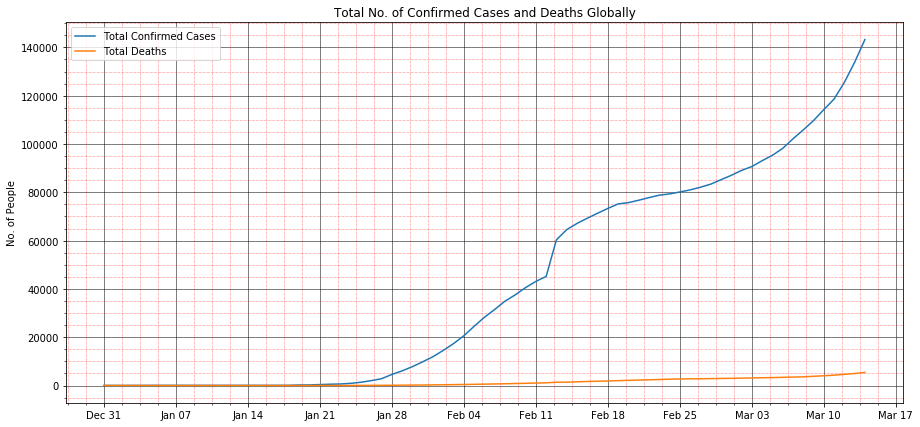

In [21]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_global.index, df_global['Total_NewConfCases'])
ax.plot(df_global.index, df_global['Total_NewDeaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.set_ylabel('No. of People')

plt.title("Total No. of Confirmed Cases and Deaths Globally")

plt.legend(['Total Confirmed Cases', 'Total Deaths'])

plt.savefig('Images/' + str(today) + ' Total No. of Confirmed Cases and Deaths Globally.png')

plt.show()

#### Daily New Confirmed Cases and Deaths Globally

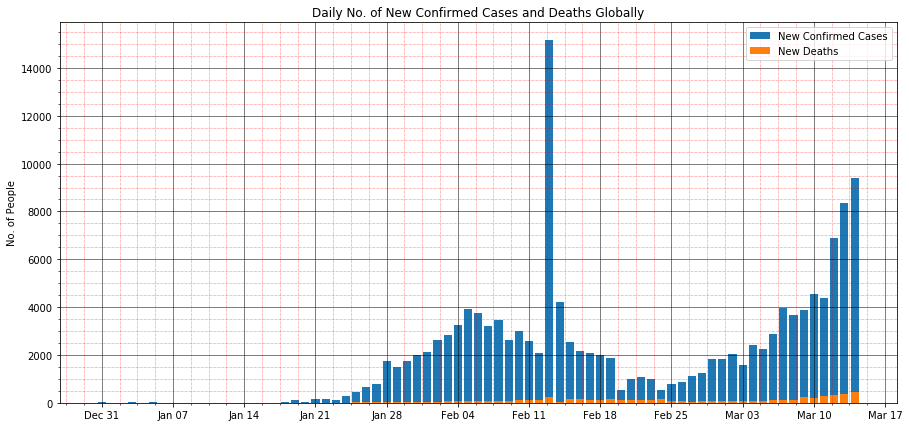

In [22]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_global.index, df_global['NewConfCases'])
ax.bar(df_global.index, df_global['NewDeaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.set_ylabel('No. of People')

plt.title("Daily No. of New Confirmed Cases and Deaths Globally")

plt.legend(['New Confirmed Cases', 'New Deaths'])

plt.savefig('Images/' + str(today) + ' Daily No. of New Confirmed Cases and Deaths Globally.png')

plt.show()

#### Top 20 Countries with the Most Confirmed Cases and Deaths

In [23]:
df_countries = df.set_index('CountryExp')

In [24]:
df_countries = df_countries.groupby('CountryExp').sum()

In [25]:
df_countries = df_countries.sort_values('NewConfCases', ascending=True)

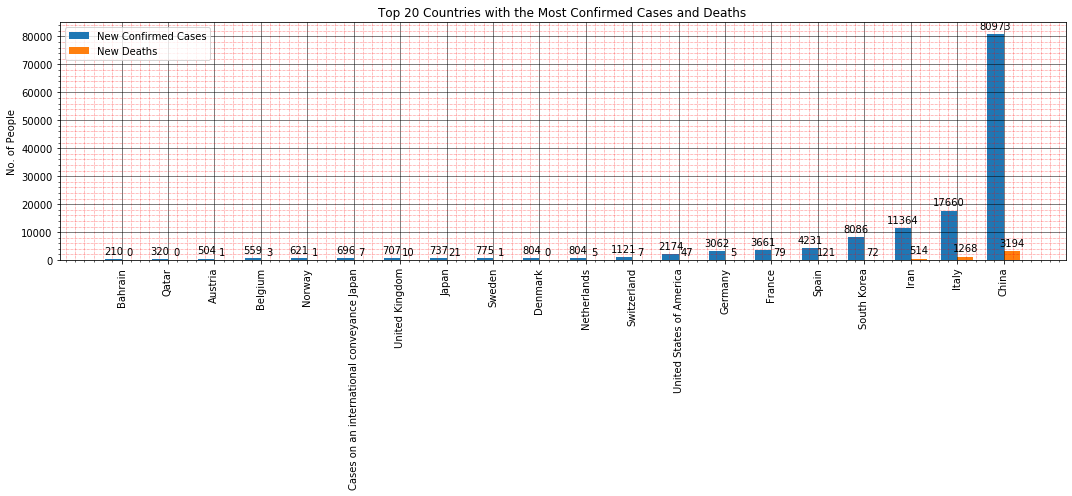

In [26]:
#plot data
labels = df_countries.index[-20:]
NewConfCases = df_countries['NewConfCases'][-20:]
NewDeaths = df_countries['NewDeaths'][-20:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, NewConfCases, width, label='New Confirmed Cases')
rects2 = ax.bar(x + width/2, NewDeaths, width, label='New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Top 20 Countries with the Most Confirmed Cases and Deaths')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Top 20 Countries with the Most Confirmed Cases and Deaths.png')

plt.show()

  #### Find Latest Data from Yesterday

In [27]:
yesterday = today - timedelta(days = 1)

In [28]:
df_yesterday = df.loc[yesterday]
df_yesterday.set_index('CountryExp', inplace=True)

In [29]:
df_yesterday = df_yesterday.sort_values('NewConfCases', ascending=True)

In [30]:
df_yesterday

,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
CountryExp,,,,,
Bosnia and Herzegovina,0,0,BA,NaN,Potential EU Candidate
Azerbaijan,0,0,AZ,NaN,Non-EU/EEA
Bhutan,0,0,BT,NaN,Non-EU/EEA
Bahrain,0,0,BH,NaN,Non-EU/EEA
Trinidad and Tobago,1,0,TT,NaN,Non-EU/EEA
...,...,...,...,...,...
France,595,13,FR,NaN,EU
Germany,802,2,DE,NaN,EU
Spain,864,37,ES,NaN,EU


#### Total No. of Confirmed Cases and Deaths Yesterday Globally

In [31]:
df_yesterday.NewConfCases.sum()

8352

In [32]:
df_yesterday.NewDeaths.sum()

351

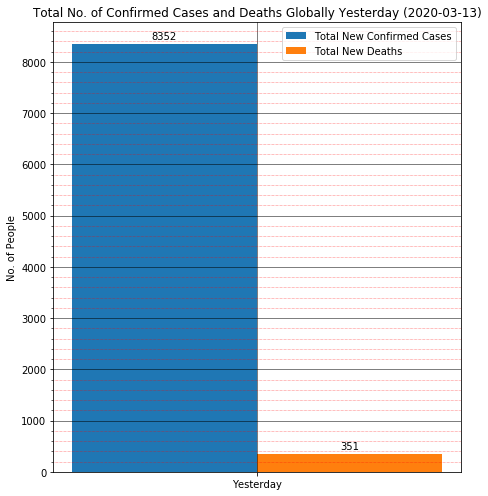

In [33]:
#plot data
labels = ['Yesterday']
NewConfCases = df_yesterday.NewConfCases.sum()
NewDeaths = df_yesterday.NewDeaths.sum()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 7))
rects1 = ax.bar(x - width/2, NewConfCases, width, label='Total New Confirmed Cases')
rects2 = ax.bar(x + width/2, NewDeaths, width, label='Total New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Total No. of Confirmed Cases and Deaths Globally Yesterday (' + str(yesterday) + ')')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Total No. of Confirmed Cases and Deaths Globally Yesterday (' + str(yesterday) + ').png')

plt.show()

#### Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday

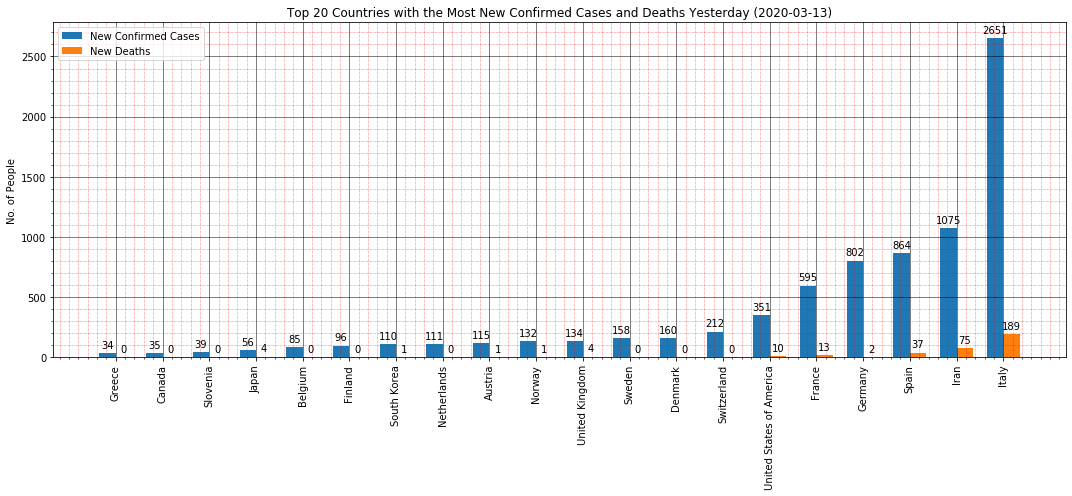

In [34]:
#plot data
labels = df_yesterday.index[-20:]
NewConfCases = df_yesterday['NewConfCases'][-20:]
NewDeaths = df_yesterday['NewDeaths'][-20:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, NewConfCases, width, label='New Confirmed Cases')
rects2 = ax.bar(x + width/2, NewDeaths, width, label='New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday (' + str(yesterday) + ')')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday ('
            + str(yesterday) + ').png')

plt.show()

#### Find Data for Specific Countries (e.g. DE, UK, CN) and Compare

(Can also be EU-wide too by using ```df.loc[df['EU'] == "EU"]``` )

In [43]:
df_sub1 = df.loc[df['GeoId'] == "CA"]
df_sub2 = df.loc[df['GeoId'] == "BR"]

#### Daily No. of New Confirmed Cases and Deaths in X & Y

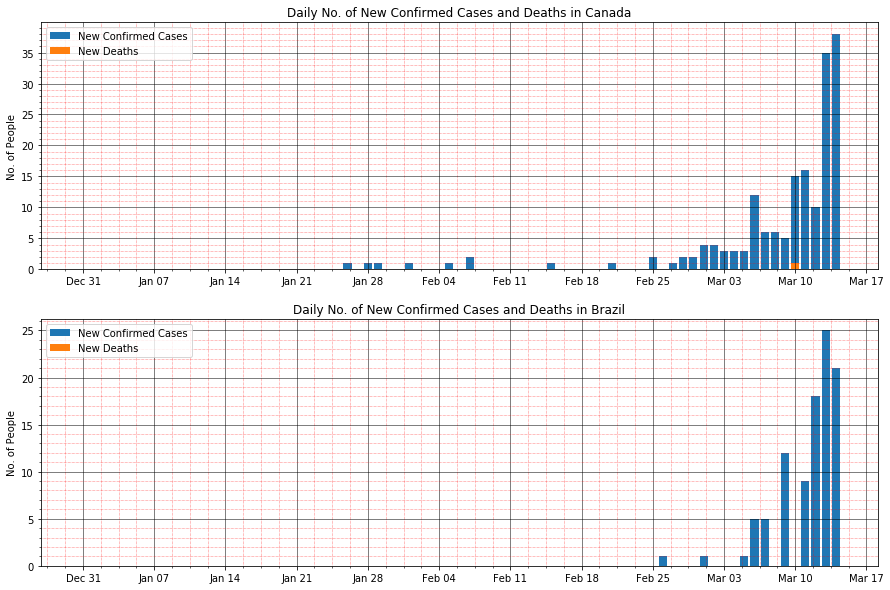

In [44]:
#plot data
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].bar(df_sub1.index, df_sub1['NewConfCases'])
axs[0].bar(df_sub1.index, df_sub1['NewDeaths'])

#Set 
axs[1].bar(df_sub2.index, df_sub2['NewConfCases'])
axs[1].bar(df_sub2.index, df_sub2['NewDeaths'])

#set ticks every week
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Gridlines
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[0].set_ylabel('No. of People')

axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[1].set_ylabel('No. of People')


#Titles
title1 = df_sub1['CountryExp'].unique()[0]
title2 = df_sub2['CountryExp'].unique()[0]
axs[0].title.set_text("Daily No. of New Confirmed Cases and Deaths in " + title1)
axs[1].title.set_text("Daily No. of New Confirmed Cases and Deaths in " + title2)

#Legends
axs[0].legend(['New Confirmed Cases', 'New Deaths'], loc=2)
axs[1].legend(['New Confirmed Cases', 'New Deaths'], loc=2)

plt.savefig('Images/' + str(today) + ' Daily No. of New Confirmed Cases and Deaths in ' + title1 + ' & ' + title2 + '.png')

plt.show()

#### Total No. of Confirmed Cases and Deaths in X & Y

In [45]:
df_sub1['Total_NewConfCases'] = df_sub1.loc[:,'NewConfCases'].cumsum()
df_sub1['Total_NewDeaths'] = df_sub1.loc[:,'NewDeaths'].cumsum()

df_sub2['Total_NewConfCases'] = df_sub2.loc[:,'NewConfCases'].cumsum()
df_sub2['Total_NewDeaths'] = df_sub2.loc[:,'NewDeaths'].cumsum()


C:\Users\Josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

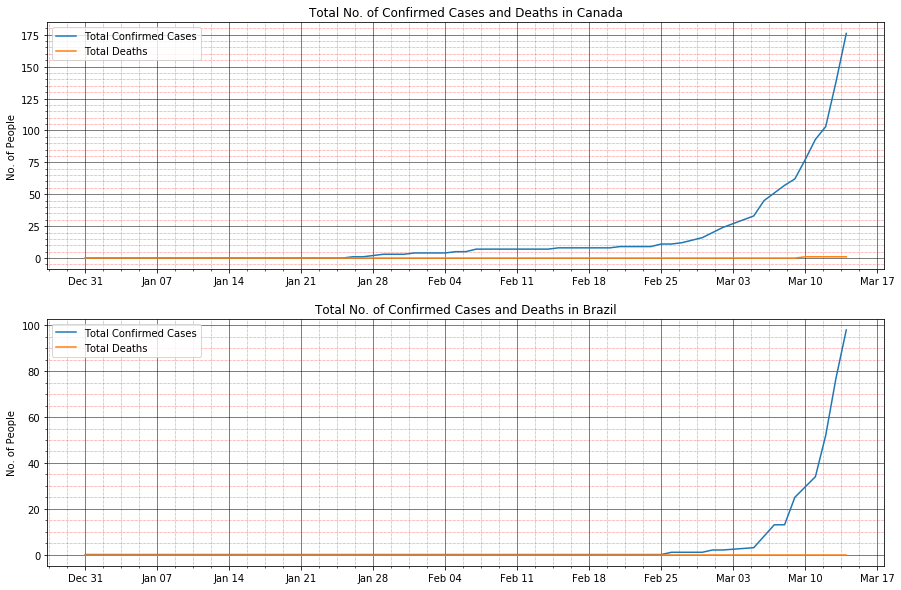

In [46]:
#plot data
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(df_sub1.index, df_sub1['Total_NewConfCases'])
axs[0].plot(df_sub1.index, df_sub1['Total_NewDeaths'])

#Set 
axs[1].plot(df_sub2.index, df_sub2['Total_NewConfCases'])
axs[1].plot(df_sub2.index, df_sub2['Total_NewDeaths'])

#set ticks every week
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Gridlines
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[0].set_ylabel('No. of People')

axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[1].set_ylabel('No. of People')


#Titles
title1 = df_sub1['CountryExp'].unique()[0]
title2 = df_sub2['CountryExp'].unique()[0]
axs[0].title.set_text("Total No. of Confirmed Cases and Deaths in " + title1)
axs[1].title.set_text("Total No. of Confirmed Cases and Deaths in " + title2)

#Legends
axs[0].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)
axs[1].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)

plt.savefig('Images/'+str(today) + ' Total No. of Confirmed Cases and Deaths in ' + title1 + ' & ' + title2 + '.png')

plt.show()